In [142]:
import torch
from torch.autograd import Variable
from torch.nn.parameter import Parameter
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import torchvision

In [161]:
import torchvision.models as models
from sklearn.preprocessing import Normalizer

In [24]:
import pandas as pd
import numpy as np
import os
from skimage import io
from skimage.transform import rescale
import matplotlib.pyplot as plt

# Import data

In [25]:
img_name = "./dataset_v2/root/train/classes/bus/10095_23498.png"
image = io.imread(img_name)

In [115]:
target = 224
rescale_factor = target/image.shape[0]
image_rescaled = rescale(image, rescale_factor, anti_aliasing=False)

/home/bok/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:24: UserWarning: The default multichannel argument (None) is deprecated.  Please specify either True or False explicitly.  multichannel will default to False starting with release 0.16.
  warn('The default multichannel argument (None) is deprecated.  Please '
/home/bok/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


In [116]:
test_image = image_rescaled[:,:,:3]

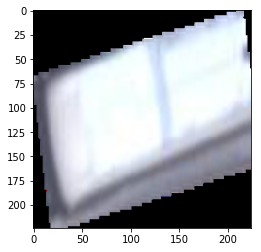

In [117]:
plt.imshow(test_image)
plt.show()

# test feedforward on resnet

In [118]:
resnet50 = models.resnet50(pretrained='imagenet')

## Prepare data for resnet

In [148]:
test = test_image.transpose((-1, 0, 1))

test_batch = np.asarray([test]*64)

## test forward pass on resnet

In [171]:
x = Variable(torch.from_numpy(test_bath)).float()
resnet50(x).shape

torch.Size([64, 1000])

# Define network as in paper

## Freeze resnet wheights

In [170]:
#define the model
model_conv = models.resnet50(pretrained='imagenet')

# disable autograd for resnet
for param in model_conv.parameters():
    param.requires_grad = False
    
# Change fully connected layer to match paper (autograd is default on new layers)
num_ftrs = model_conv.fc.in_features
model_conv.fc = nn.Linear(num_ftrs, 1024)

# add layer
model_conv.add(nn_Linear(1024,32))

In [183]:

# define network
class Net(nn.Module):

    def __init__(self):
        super(Net, self).__init__()  
        # input layer
        self.output = nn.Linear(1024,32)
       

    def forward(self, x):
        x = model_conv(x)
        x = F.relu(x)
        x = self.output(x)
        x = F.softmax(x)
        return x


net = Net()

In [184]:
net(x).shape

/home/bok/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  from ipykernel import kernelapp as app


torch.Size([64, 32])